# 1 Introduction

Welcome to the 6th practical session of CS233 - Introduction to Machine Learning.  
We will start using scikit-learn, a Python package of machine learning methods.  
Use it to train SVM with different kernel functions and learn how tune their parameters.

In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%load_ext autoreload
%autoreload 2

# 2 Scikit-Learn
Scikit-Learn is a machine learning library written in python. Most of the machine learning algorithms and tools are already implemented for you to use. In this exercise, we'll use this package to train SVM. In order to install scikit-learn follow instructions at this link:https://scikit-learn.org/stable/install.html


Scikit-Learn has modules implemented broadly for 
- Data Transformations: https://scikit-learn.org/stable/data_transforms.html
- Model Selection and Training: https://scikit-learn.org/stable/model_selection.html
- Supervised Techniques: https://scikit-learn.org/stable/supervised_learning.html
- Unsupervised Techniques: https://scikit-learn.org/stable/unsupervised_learning.html


All the magic happens under the hood, but gives you freedom to try out more complicated stuff.  
Different methods to be noted here are
- `fit`: Train a model with the data
- `predict`: Use the model to predict on test data
- `score`: Return mean accuracy on the given test data

Have a look at [this](https://scikit-learn.org/stable/tutorial/basic/tutorial.html#learning-and-predicting) for simple example.

# 3  Support Vector Machine(SVM)

SVM tries to solve optimization problem of the **primal form**:  
    $\underset{\mathbf{w},b,\zeta}{\operatorname{argmin}} \frac{1}{2}\|\mathbf{w}\|^2 + C \sum^N_{n=1}\zeta_n$ 
    
   subject to $\zeta_n \geq 0$ and $t_n(\mathbf{w}^T\mathbf{\phi(x_n)}+\mathbf{b}) \geq 1-\zeta_n$ , for all n
   
where, $\mathbf{w}$,$\mathbf{b}$ are weight and bias. C is penalty term, $\zeta_n$ is error in terms of how far data point is beyond correct margin and $t_n \in\{-1,1\}$. $\|\mathbf{w}\|$ is inversely related to margin width, so minimizing it means maximizing the margin, hence we minimize $\|\mathbf{w}\|$. As our data may not be linearly separable, hence maximizing margin will lead to some misclassifications. $\zeta_n$ is greater than zero when a data point is beyond margin and how many such data points are allowed is controlled by C. We choose the right value for C, given the data, through validation set. Hence with this objective function we get a maximum margin with certain amount of misclassification.

The corresponding **dual problem** is given by:

maximize
$L(a) =  \sum_{n=1}^N a_n - \frac 1 2 \sum_{n=1}^N\sum_{m=1}^N a_na_mt_nt_mk(x_n,x_m)$    

subject to
$C \geq a_n \geq 0 \text{ for all }n$ and $\sum_{n=1}^N a_nt_n = 0$

**Question**
   * How can you write $\mathbf{w}$ using $a_n$'s and basis function $\phi$ ? This relates primal and dual coefficents.
   * How is $y(\mathbf{x})$ represented using $a_n$'s and kernel function $k$?

Have a look at the SVM function [here.](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) The main parameters you should look for are:
- Kernel Function: Linear, Polynomial and RBF
- Penalty term: C 
- Gamma: for RBF and Polynomial kernel
- Degree: for polynomial kernel



### 3.1 Binary Classification
Let's try with simple **binary classification** using SVM.  
First we begin with simple linearly separable data.

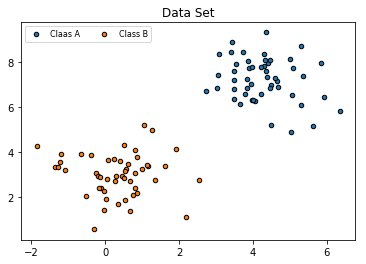

In [2]:
#RUN THIS CELL#
from helpers import get_simple_dataset
from plots import plot
from matplotlib import pyplot as plt

# Get the simple dataset
X, Y = get_simple_dataset()
plot(X,Y,None,dataOnly=True)

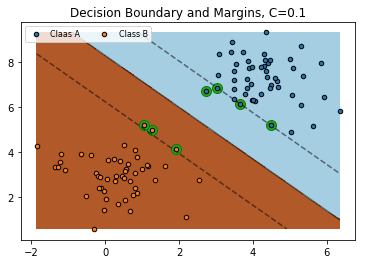

In [3]:
from sklearn import svm 
import numpy as np

# CODE HERE #
#Get SVM model with linear kernel and C=0.1
clf = svm.SVC(C=0.1, kernel='linear')

#call the fit method
clf.fit(X, Y)


#plot the decision boundary
plot(X, Y, clf)

Plot should be shown with the decision boundary and margins of the learnt model. Encircled points are the support vectors.  
**WARNING**: if the margins go beyound the limits of axis, they are not shown or shown close to decision plane. 

### 3.2 Dual Coefficients
Use `dual_coef_` attribute of the model to get the dual coefficients $a_n$ of the support vectors.  
**Question** How does this value relate to margin penalty C? Scikit returns dual coeff in slightly different form, can you identify the difference?

In [4]:
#CODE HERE#
# use dual_coef_ to see dual coefficients
print(clf.dual_coef_)

[[-0.1        -0.07157226 -0.02842774 -0.1         0.1         0.1
   0.1       ]]


### 3.3 Different C values
Let's try different values of C. In the code, vary the C value from 0.001 to 100 and notice the changes.  
**Question** How does the margin vary with C? **Hint**: have a look at the optimization formulation above.

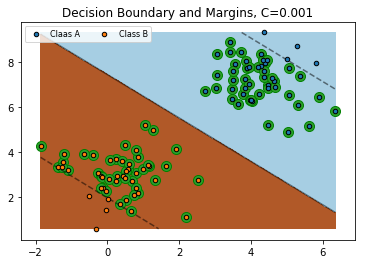

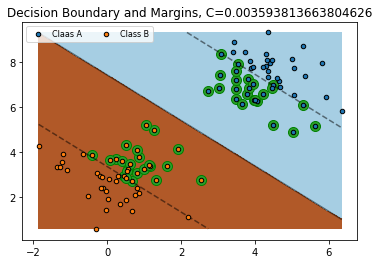

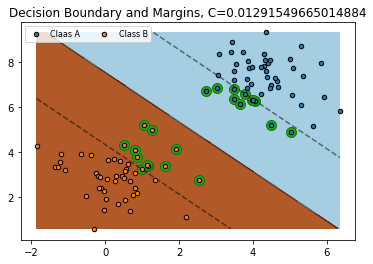

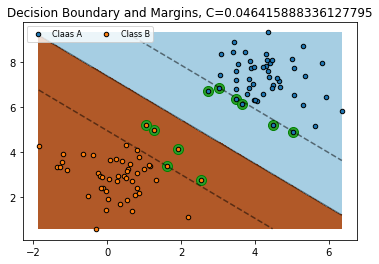

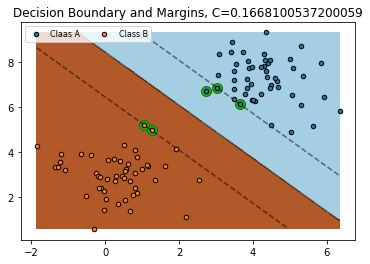

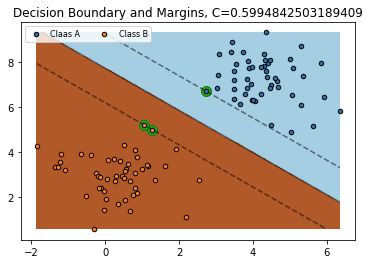

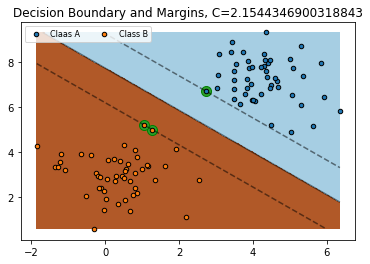

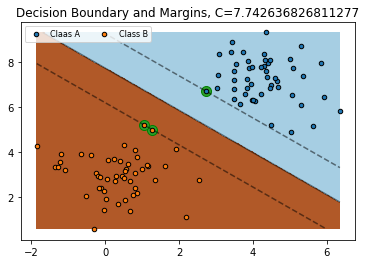

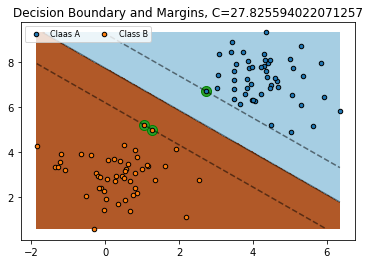

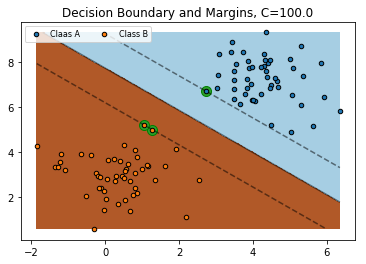

In [5]:
# CODE HERE #
# Vary C and plot the boundaries
# Use np.logspace to generate C values

C = np.logspace(-3, 2, num=10)
for c in C:
    #Get SVM model with linear kernel 
    clf = svm.SVC(C=c, kernel='linear')

    #call the fit method
    clf.fit(X, Y)

    #plot the decision boundary
    plot(X, Y, clf)

### 3.4 Different Kernels
We will try out Polynomial and RBF kernels. Have a look at the type of decision boundary created.


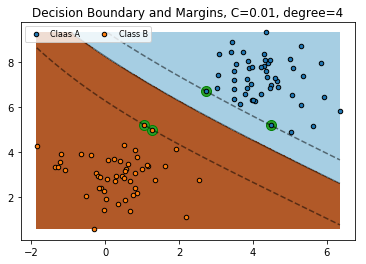

In [6]:
#CODE HERE#
# Use SVM with Polynomial Kernel of different degrees and C
clf = svm.SVC(C=0.01, kernel='poly', degree=4)
#call the fit method
clf.fit(X, Y)

plot(X, Y, clf)

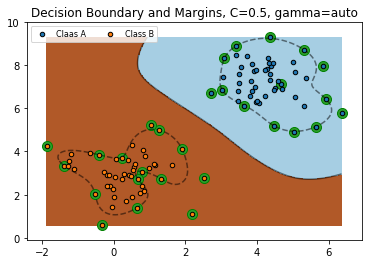

In [7]:
#CODE HERE#
# Use SVM with RBF with different gamma 
clf = svm.SVC(C=0.5, gamma='auto')
#call the fit method
clf.fit(X, Y)

plot(X, Y, clf)

### 3.5 Non Linearly Separable Data
Util now we have worked with linear data in the given feature space. Most of the time that's not the case. We'll use non linear data and use non linear kernels to do classification. These kernels project the data to higher dimension and which helps in finding out a linear decision boundary.

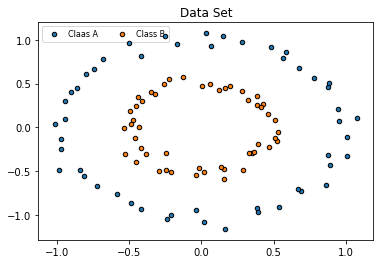

In [8]:
#RUN THIS CELL#
from helpers import get_circle_dataset

X,Y = get_circle_dataset()
plot(X,Y,None,dataOnly=True)

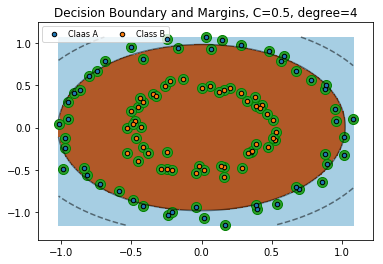

In [9]:
#CODE HERE#

# Use Polynomial Kernel and call fit method
clf = svm.SVC(C=0.5, kernel='poly', degree=4)
clf.fit(X, Y)

plot(X, Y, clf)

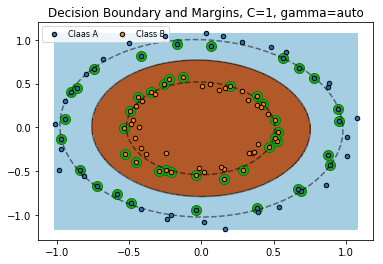

In [10]:
#CODE HERE#

# Use RBF Kernel and call fit method
clf = svm.SVC(C=1, gamma='auto')
clf.fit(X, Y)

plot(X, Y, clf)

### 3.6 Cross Validation
While trying the above exercises with different values (called hyperparameters) of C, gamma or degree, or kernels, we obtain different boundaries and classfication. Naturally, question arises what are the best parameters and how can we choose one?  
Cross Validation(CV) technique is used to choose the best parameters for separate validation set, where the hope is that this set will be close to the (unseen) test set. We train our model on train set and use hyperparameters which give best results on validation set. This is a general technique to choose your best machine learning model.

K-fold is a type of CV technique that we'll see here. We'll split data in K parts and use kth part for validation, whereas k-1 for training. This process will be repeated K times. Metric used to evaluate the model is accuracy on the validation set.  

Sklearn already provide a method to do [Cross Validation](https://scikit-learn.org/stable/modules/cross_validation.html), which you can use. But to understand the concept, we'll code this time. [Here](https://medium.com/datadriveninvestor/k-fold-cross-validation-6b8518070833), you can find explanation with a toy example.

We'll use Iris dataset, which you have seen before. Use some of the data to train and rest as validation.

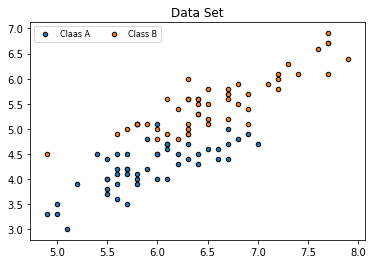

In [11]:
#RUN THIS CELL#
from helpers import get_iris_dataset
X,Y = get_iris_dataset()
plot(X, Y, None, dataOnly=True)

In [12]:
# Function to split data indices
# num_examples: total samples in the dataset
# k_fold: number fold of CV
# returns: array of shuffled indices with shape (k_fold, num_examples//k_fold)
def fold_indices(num_examples,k_fold):
    ind = np.arange(num_examples)
    split_size = num_examples//k_fold
    
    #important to shuffle your data
    np.random.seed(42)
    np.random.shuffle(ind)
    
    k_fold_indices = np.split(ind, k_fold)
    #CODE HERE#
    # Generate k_fold set of indices
         
    return np.array(k_fold_indices)

total_samples = X.shape[0]
print(fold_indices(total_samples,4))

[[83 53 70 45 44 39 22 80 10  0 18 30 73 33 90  4 76 77 12 31 55 88 26 42
  69]
 [15 40 96  9 72 11 47 85 28 93  5 66 65 35 16 49 34  7 95 27 19 81 25 62
  13]
 [24  3 17 38  8 78  6 64 36 89 56 99 54 43 50 67 46 68 61 97 79 41 58 48
  98]
 [57 75 32 94 59 63 84 37 29  1 52 21  2 23 87 91 74 86 82 20 60 71 14 92
  51]]


In [13]:
#RUN THIS CELL#

from sklearn.preprocessing import StandardScaler
# it's good to standarize our data. Helps in faster convergence.
scaler = StandardScaler()

# Function for using kth split as validation set to get accuracy
# and k-1 splits to train our model
def do_cross_validation(clf,k,k_fold_ind,X,Y):
    
    # use one split as val
    val_ind = k_fold_ind[k]
    # use k-1 split to train
    train_splits = [i for i in range(k_fold_ind.shape[0]) if i is not k]
    train_ind = k_fold_ind[train_splits,:].reshape(-1)
    
    #Get train and val 
    X_train = X[train_ind,:]
    Y_train = Y[train_ind]
    X_val = X[val_ind,:]
    Y_val = Y[val_ind]
    
    scaler.fit(X_train)
    X_train = scaler.fit_transform(X_train)
    #fit the train transformation on val
    X_val = scaler.fit_transform(X_val)
    
    #fit on train set
    clf.fit(X_train,Y_train)
    #get accuracy for val
    acc = clf.score(X_val,Y_val)
    return acc

We use Grid Search technique to sample from the hyperparameter space. Then for each set of hyperparameter, K-Fold CV is done. We take the mean of K accuracies obtain by CV, to represent performance of model with those hyperparameters. When using RBF kernel, we wish to tune Gamma and C on validation set.

In [14]:
# better to search in log space 
grid_search_c = np.logspace(-6,12,num=19)
grid_search_gamma = np.logspace(-9,5,num=15)

#save the accuracy scores for the combination of hyperparameters
grid_val = np.zeros((len(grid_search_c),len(grid_search_gamma)))

# Do 4 fold CV
k_fold = 4
k_fold_ind = fold_indices(X.shape[0],k_fold)

for i, c in enumerate(grid_search_c):
    for j, g in enumerate(grid_search_gamma):
        print('Evaluating for C:{} gamma:{} ...'.format(c,g))
        #CODE HERE#
        # call SVM with c,g as param.
        clf = svm.SVC(C=c, gamma=g)
        
        acc = np.zeros(k_fold)
        # do cross validation
        for k in range(k_fold):
            indices = k_fold_ind[k]
            inverse_indices = np.ones(X.shape[0], np.bool)
            inverse_indices[indices] = 0
            
            clf.fit(X[inverse_indices], Y[inverse_indices])
            acc[k] = clf.score(X[indices], Y[indices])
        #aggregrate the accuracy score for k_fold runs. What function would you choose?
        grid_val[i,j] = np.mean(acc)


Evaluating for C:1e-06 gamma:1e-09 ...
Evaluating for C:1e-06 gamma:1e-08 ...
Evaluating for C:1e-06 gamma:1e-07 ...
Evaluating for C:1e-06 gamma:1e-06 ...
Evaluating for C:1e-06 gamma:1e-05 ...
Evaluating for C:1e-06 gamma:0.0001 ...
Evaluating for C:1e-06 gamma:0.001 ...
Evaluating for C:1e-06 gamma:0.01 ...
Evaluating for C:1e-06 gamma:0.1 ...
Evaluating for C:1e-06 gamma:1.0 ...
Evaluating for C:1e-06 gamma:10.0 ...
Evaluating for C:1e-06 gamma:100.0 ...
Evaluating for C:1e-06 gamma:1000.0 ...
Evaluating for C:1e-06 gamma:10000.0 ...
Evaluating for C:1e-06 gamma:100000.0 ...
Evaluating for C:1e-05 gamma:1e-09 ...
Evaluating for C:1e-05 gamma:1e-08 ...
Evaluating for C:1e-05 gamma:1e-07 ...
Evaluating for C:1e-05 gamma:1e-06 ...
Evaluating for C:1e-05 gamma:1e-05 ...
Evaluating for C:1e-05 gamma:0.0001 ...
Evaluating for C:1e-05 gamma:0.001 ...
Evaluating for C:1e-05 gamma:0.01 ...
Evaluating for C:1e-05 gamma:0.1 ...
Evaluating for C:1e-05 gamma:1.0 ...
Evaluating for C:1e-05 gamma

Evaluating for C:100000000.0 gamma:0.1 ...
Evaluating for C:100000000.0 gamma:1.0 ...
Evaluating for C:100000000.0 gamma:10.0 ...
Evaluating for C:100000000.0 gamma:100.0 ...
Evaluating for C:100000000.0 gamma:1000.0 ...
Evaluating for C:100000000.0 gamma:10000.0 ...
Evaluating for C:100000000.0 gamma:100000.0 ...
Evaluating for C:1000000000.0 gamma:1e-09 ...
Evaluating for C:1000000000.0 gamma:1e-08 ...
Evaluating for C:1000000000.0 gamma:1e-07 ...
Evaluating for C:1000000000.0 gamma:1e-06 ...
Evaluating for C:1000000000.0 gamma:1e-05 ...
Evaluating for C:1000000000.0 gamma:0.0001 ...
Evaluating for C:1000000000.0 gamma:0.001 ...
Evaluating for C:1000000000.0 gamma:0.01 ...
Evaluating for C:1000000000.0 gamma:0.1 ...
Evaluating for C:1000000000.0 gamma:1.0 ...
Evaluating for C:1000000000.0 gamma:10.0 ...
Evaluating for C:1000000000.0 gamma:100.0 ...
Evaluating for C:1000000000.0 gamma:1000.0 ...
Evaluating for C:1000000000.0 gamma:10000.0 ...
Evaluating for C:1000000000.0 gamma:100000

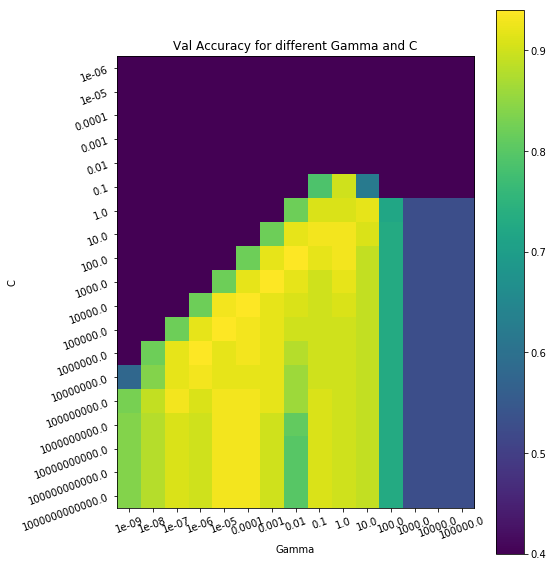

Best acc:0.94
Best Params- C:100.0, Gamma:0.01


In [15]:
from plots import plot_cv_result
plot_cv_result(grid_val,grid_search_c,grid_search_gamma)
#best acc
print('Best acc:{}'.format(np.max(grid_val)))
#best params
cin,gin = np.unravel_index(np.argmax(grid_val),grid_val.shape)
print('Best Params- C:{}, Gamma:{}'.format(grid_search_c[cin],grid_search_gamma[gin]))

Above heatmap shows accuracies for different Gamma and C values. The best params are used on test set.  
**Question** Is there a relation between C and Gamma? **Hint**:Think how increase in one value changes other. Look at the heatmap to get the idea. 

0.93


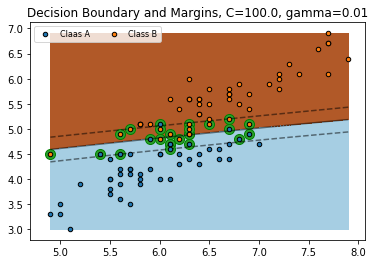

In [19]:
#C=1, gamma=100 -> acc=0.99
clf = svm.SVC(C=100.0, gamma=0.01)
clf.fit(X, Y)
print(clf.score(X, Y))
plot(X, Y, clf)

### Additional Reading (if interested)
- Multiclass SVM (Bishop- Multiclass SVMs 7.1.3)
- Can we have probabilistic interpretation of SVM? (Bishop- Relevance Support Machine 7.2)